# Import Libraries and Load Data

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonn

# Exploratory Data Analysis

In [44]:
df.drop(columns=['Unnamed: 0'], inplace=True)
summary_stats = df.describe()
print(summary_stats)

               Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticides_tonnes      avg_temp  
count       28242.000000  28242.000000  
mean        37076.909344     20.542627  
std         59958.784665      6.312051  
min             0.040000      1.300000  
25%          1702.000000     16.702500  
50%         17529.440000     21.510000  
75%         48687.880000     26.000000  
max        367778.000000     30.650000  


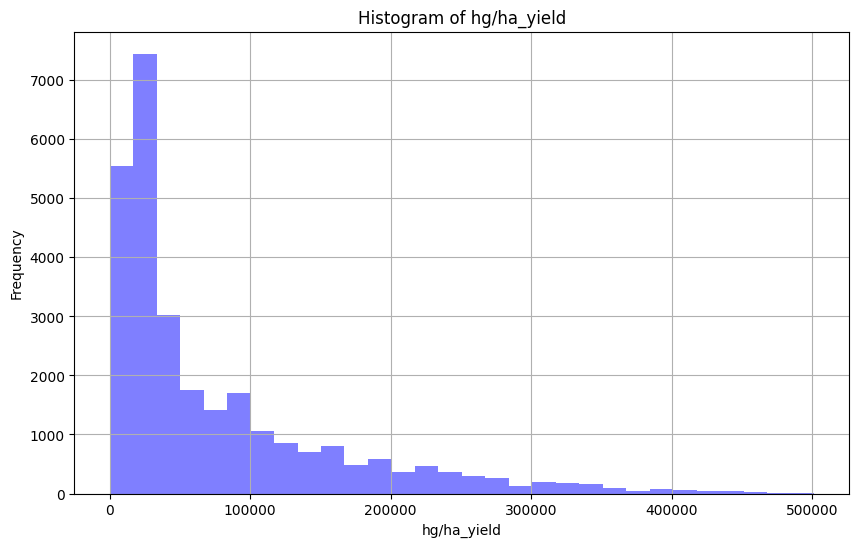

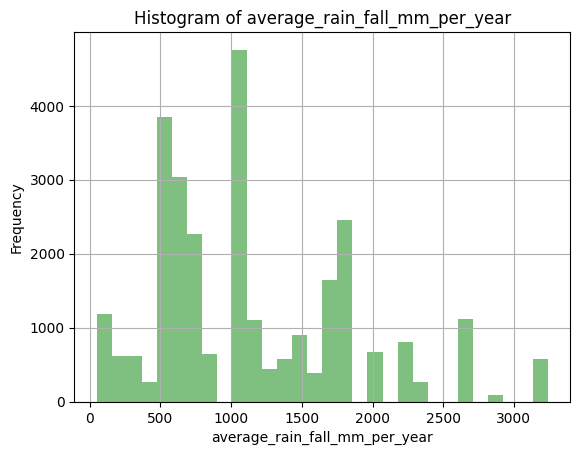

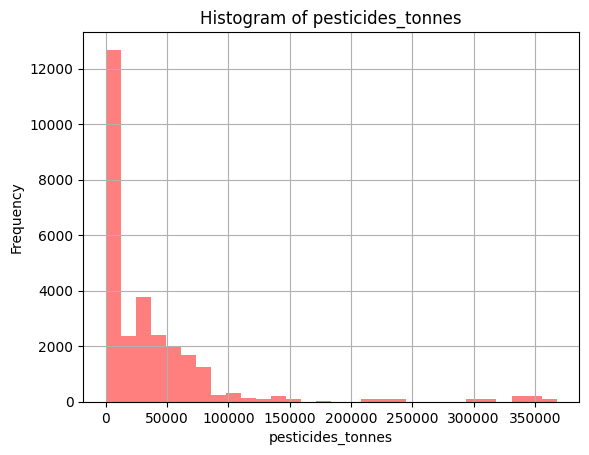

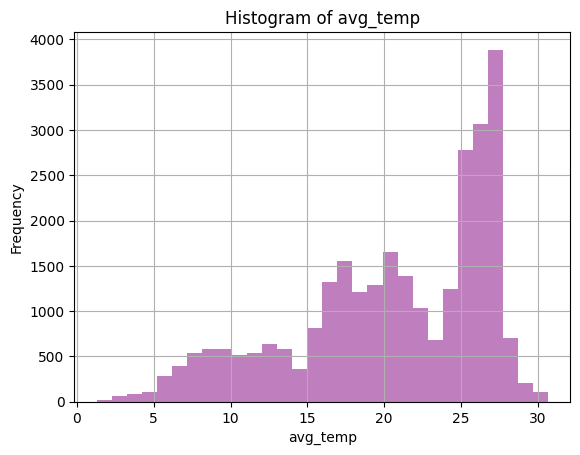

In [45]:
plt.figure(figsize=(10, 6))

# Histograms
df['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()




df['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()




df['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()


df['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()

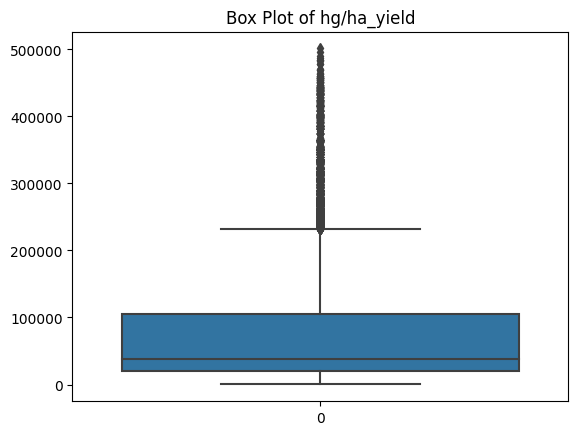

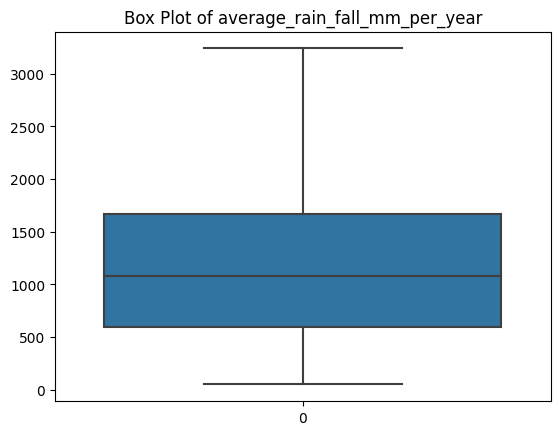

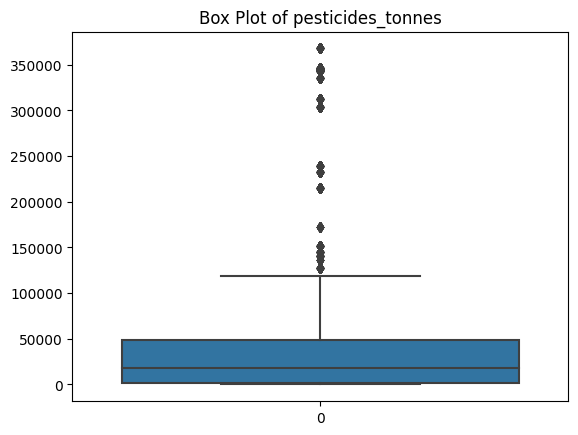

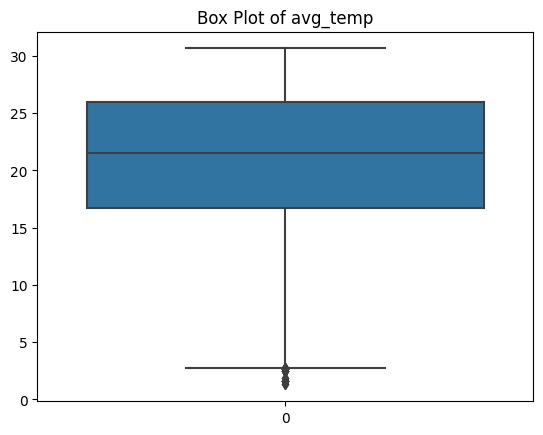

In [46]:
# Box Plots
sns.boxplot(data=df['hg/ha_yield'])
plt.title('Box Plot of hg/ha_yield')
plt.show()

sns.boxplot(data=df['average_rain_fall_mm_per_year'])
plt.title('Box Plot of average_rain_fall_mm_per_year')
plt.show()

sns.boxplot(data=df['pesticides_tonnes'])
plt.title('Box Plot of pesticides_tonnes')
plt.show()

sns.boxplot(data=df['avg_temp'])
plt.title('Box Plot of avg_temp')
plt.show()

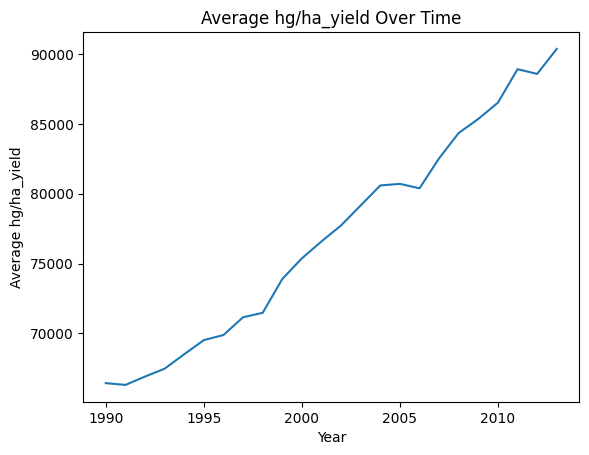

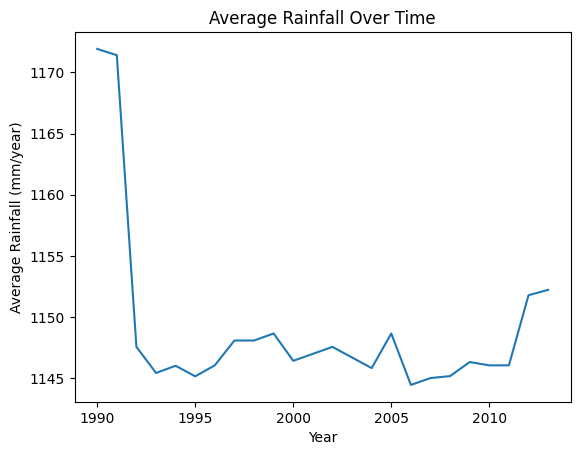

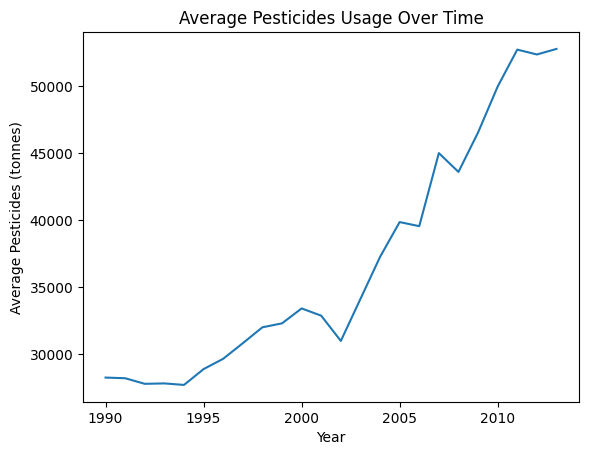

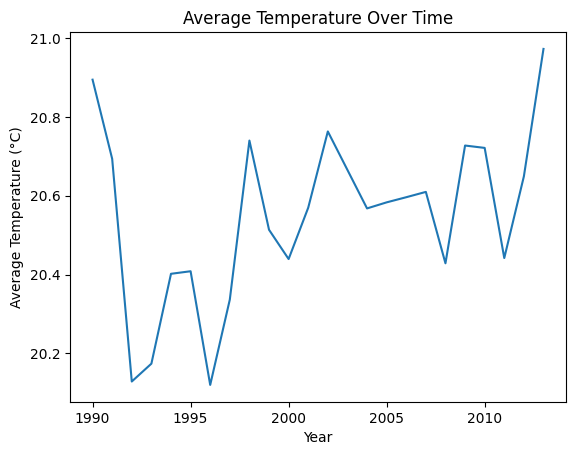

In [47]:
# Time Series Analysis
df.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot()
plt.title('Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm/year)')
plt.show()

df.groupby('Year')['pesticides_tonnes'].mean().plot()
plt.title('Average Pesticides Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Pesticides (tonnes)')
plt.show()

df.groupby('Year')['avg_temp'].mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

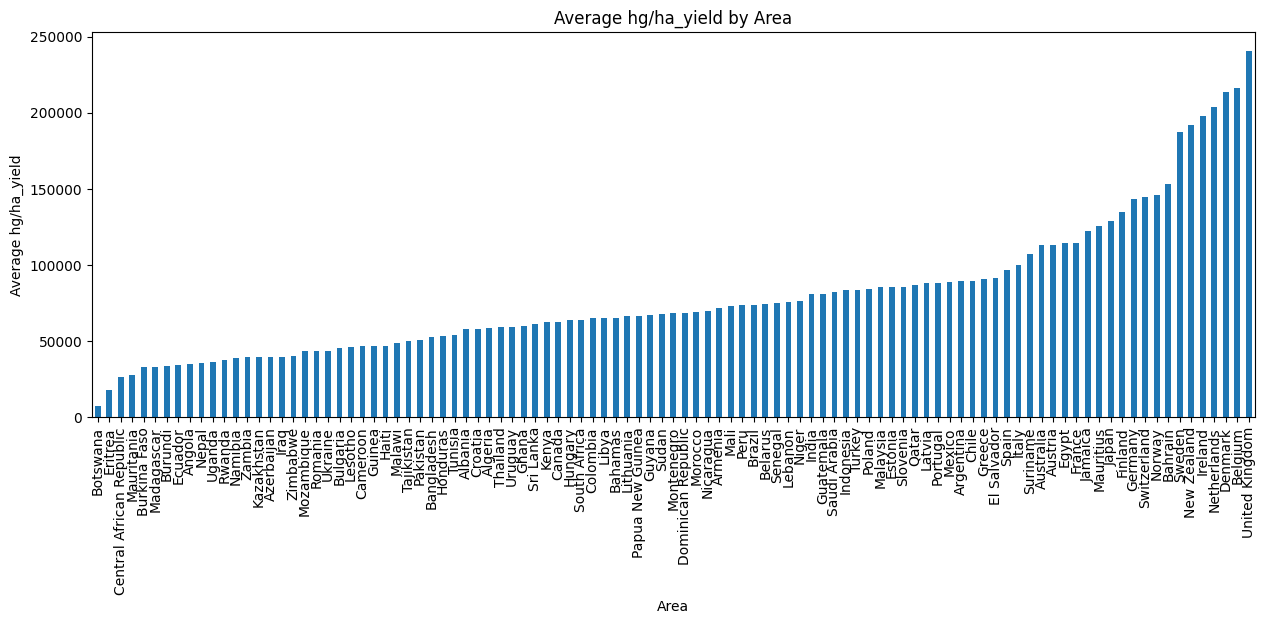

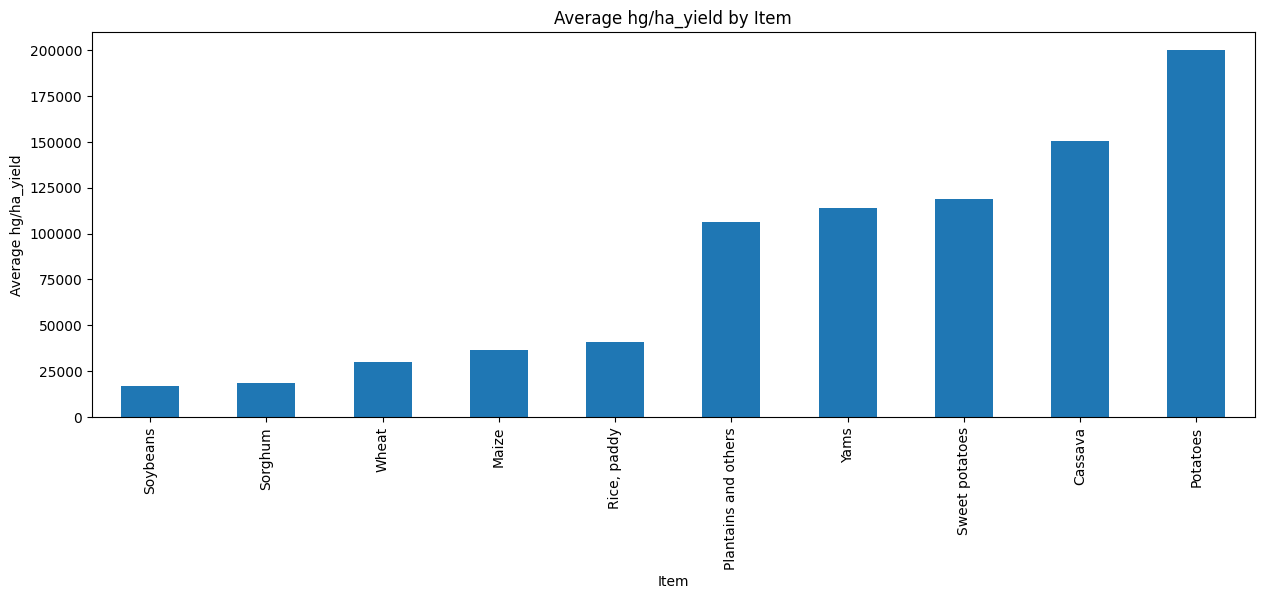

In [48]:
# Comparisons
df.groupby('Area')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Item')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Item')
plt.xlabel('Item')
plt.ylabel('Average hg/ha_yield')
plt.show()

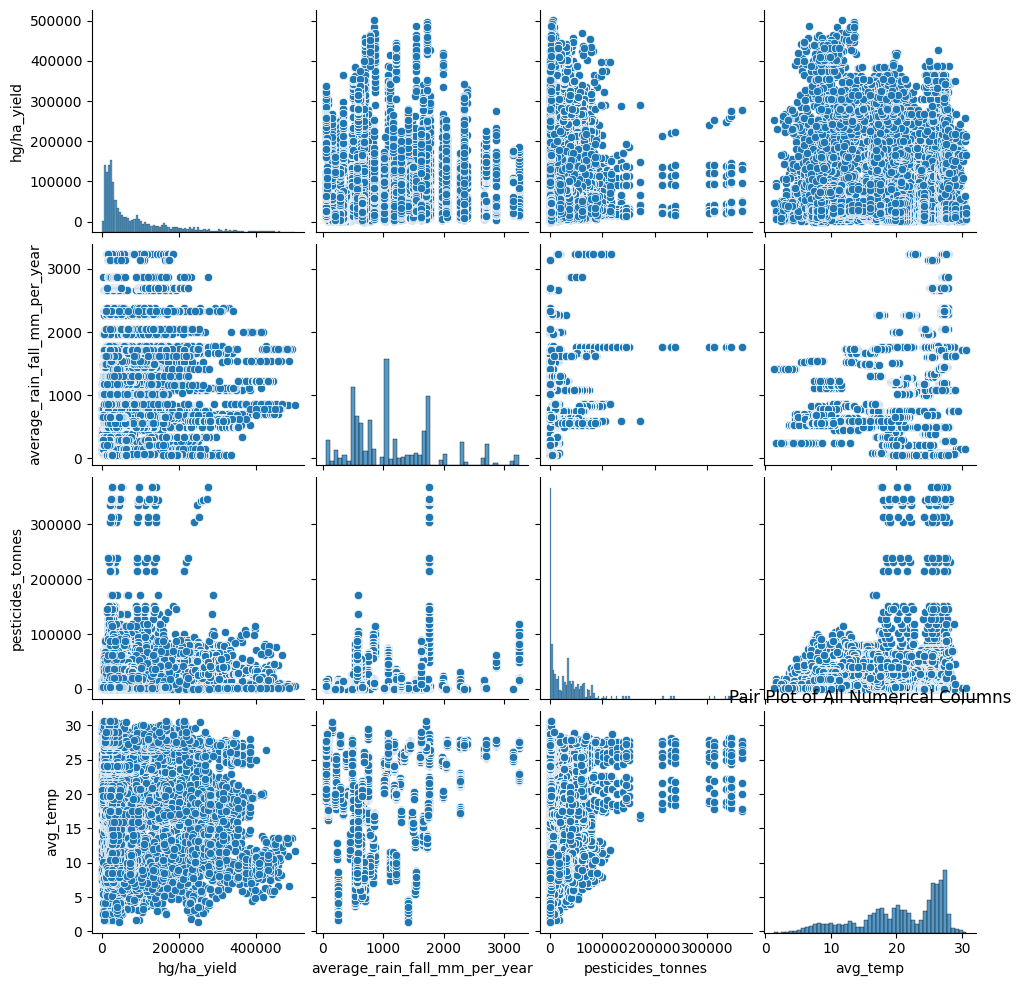

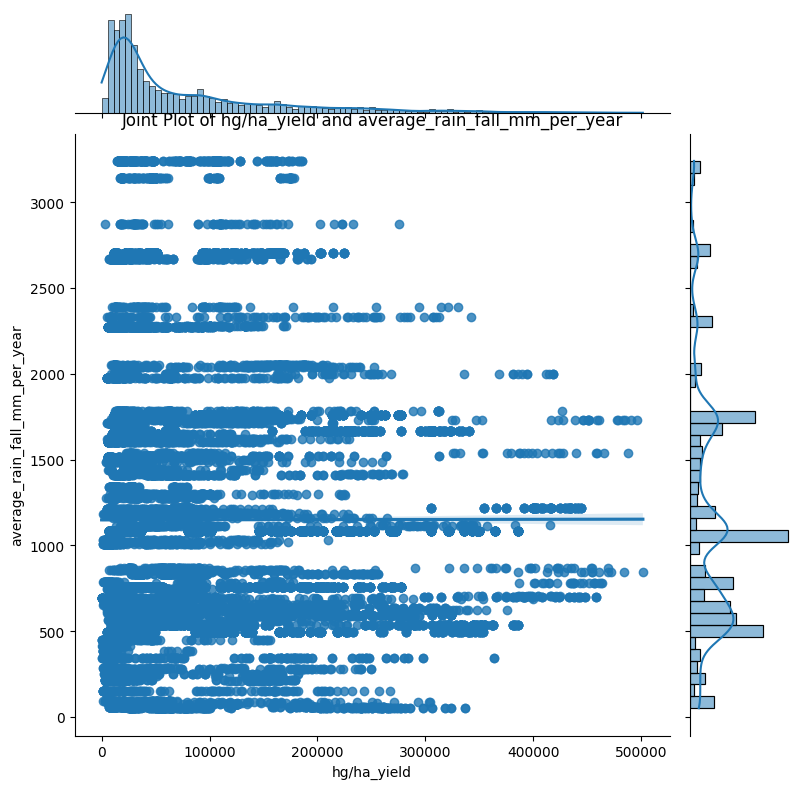

In [49]:
# Pair Plots and Joint Plots
sns.pairplot(df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']])
plt.title('Pair Plot of All Numerical Columns')
plt.show()

sns.jointplot(x='hg/ha_yield', y='average_rain_fall_mm_per_year', data=df, kind='reg', height=8)
plt.title('Joint Plot of hg/ha_yield and average_rain_fall_mm_per_year')
plt.show()

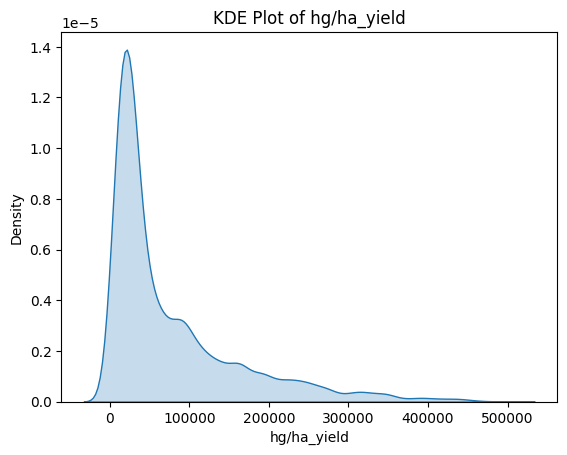

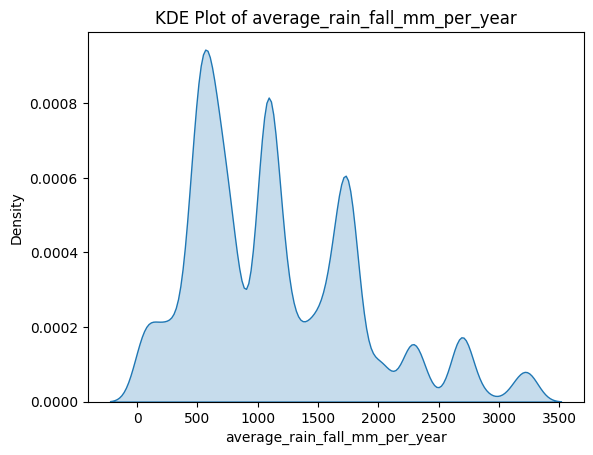

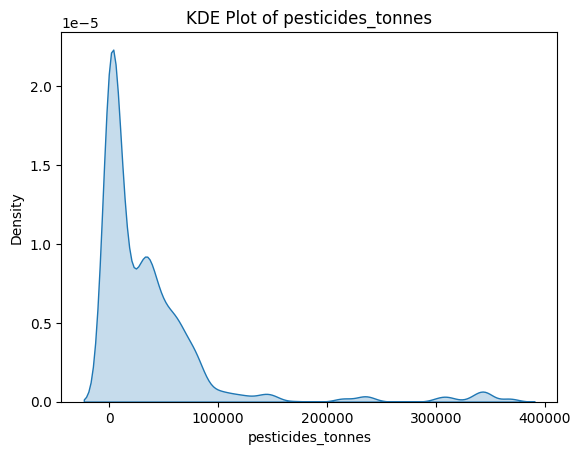

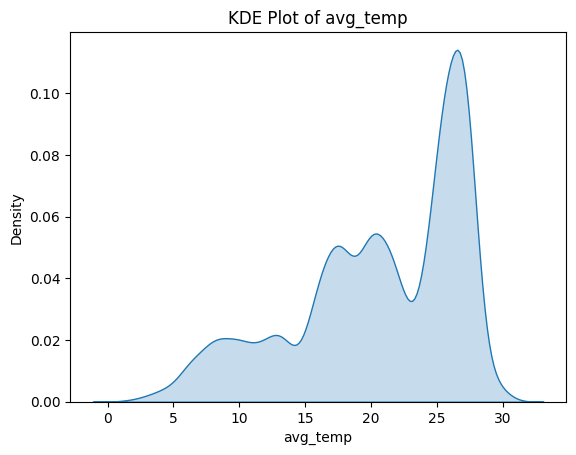

In [50]:
# Distribution Plots
sns.kdeplot(df['hg/ha_yield'], shade=True)
plt.title('KDE Plot of hg/ha_yield')
plt.show()

sns.kdeplot(df['average_rain_fall_mm_per_year'], shade=True)
plt.title('KDE Plot of average_rain_fall_mm_per_year')
plt.show()

sns.kdeplot(df['pesticides_tonnes'], shade=True)
plt.title('KDE Plot of pesticides_tonnes')
plt.show()

sns.kdeplot(df['avg_temp'], shade=True)
plt.title('KDE Plot of avg_temp')
plt.show()


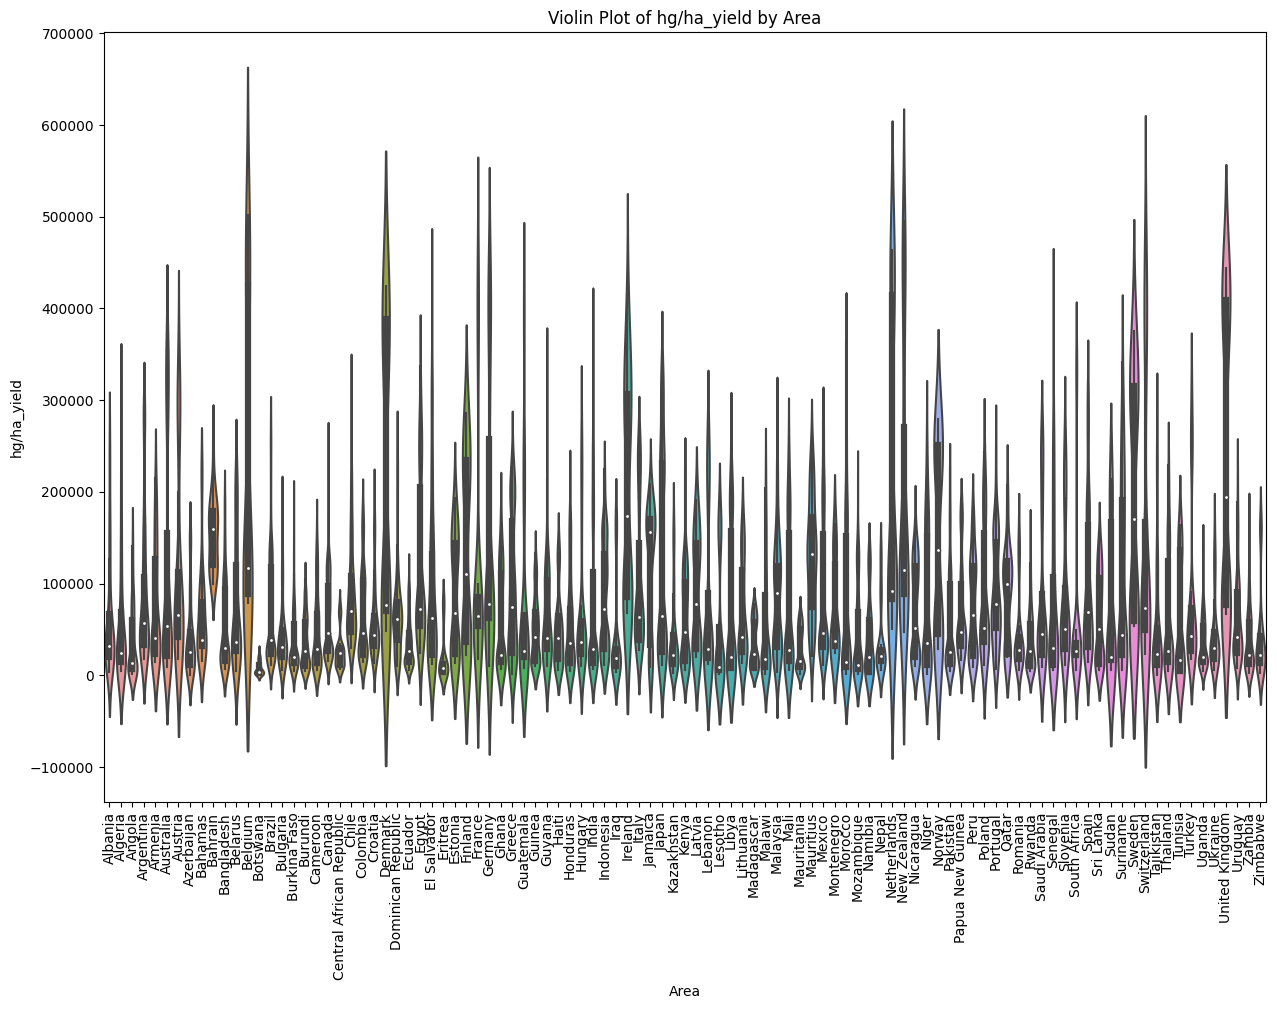

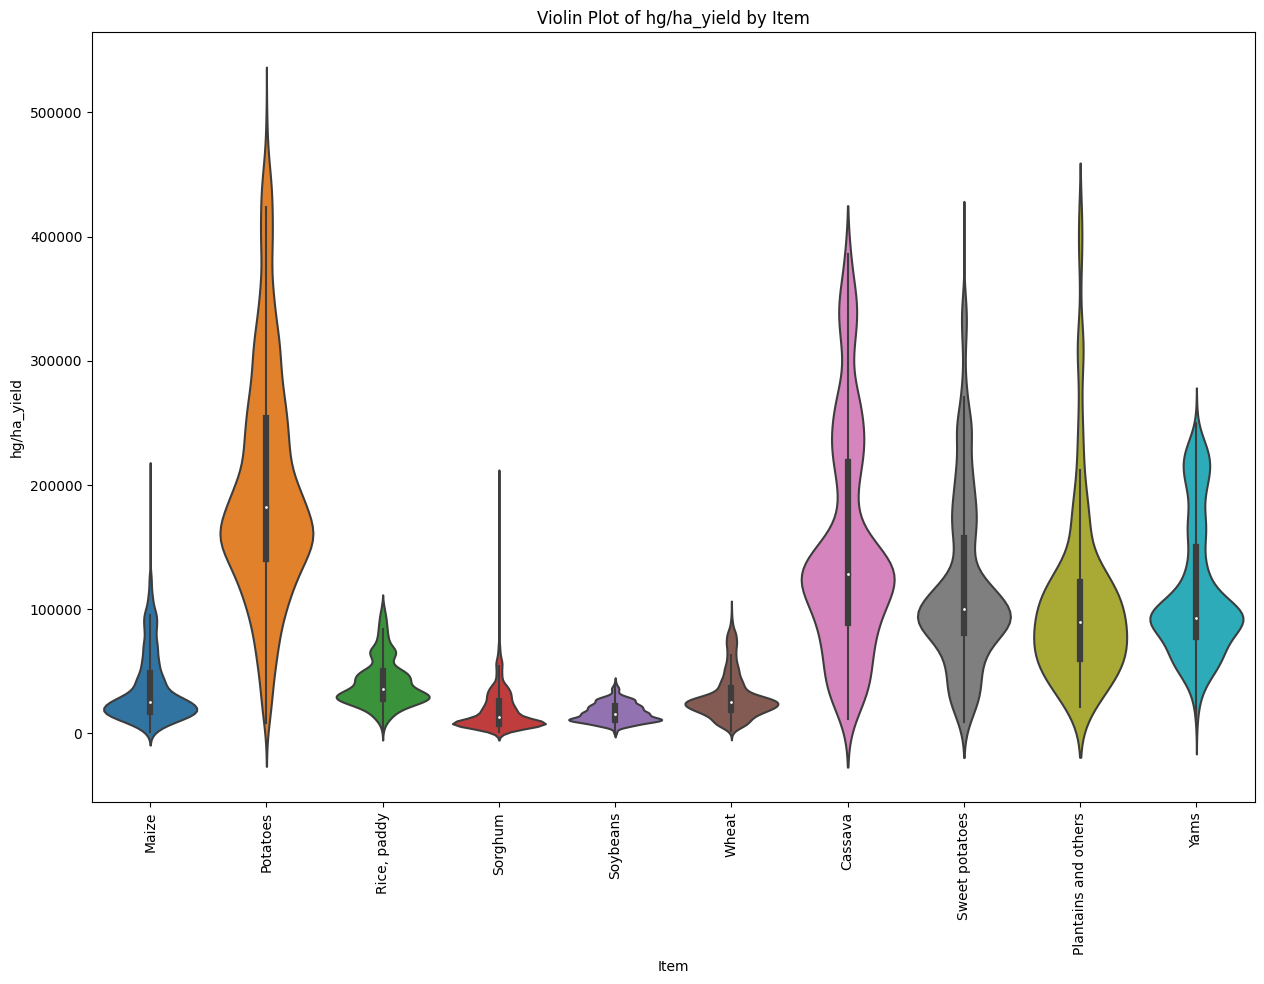

In [51]:
#Violin Plots
plt.figure(figsize=(15, 10))
sns.violinplot(x='Area', y='hg/ha_yield', data=df, scale='width')
plt.title('Violin Plot of hg/ha_yield by Area')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 10))
sns.violinplot(x='Item', y='hg/ha_yield', data=df, scale='width')
plt.title('Violin Plot of hg/ha_yield by Item')
plt.xticks(rotation=90)
plt.show()

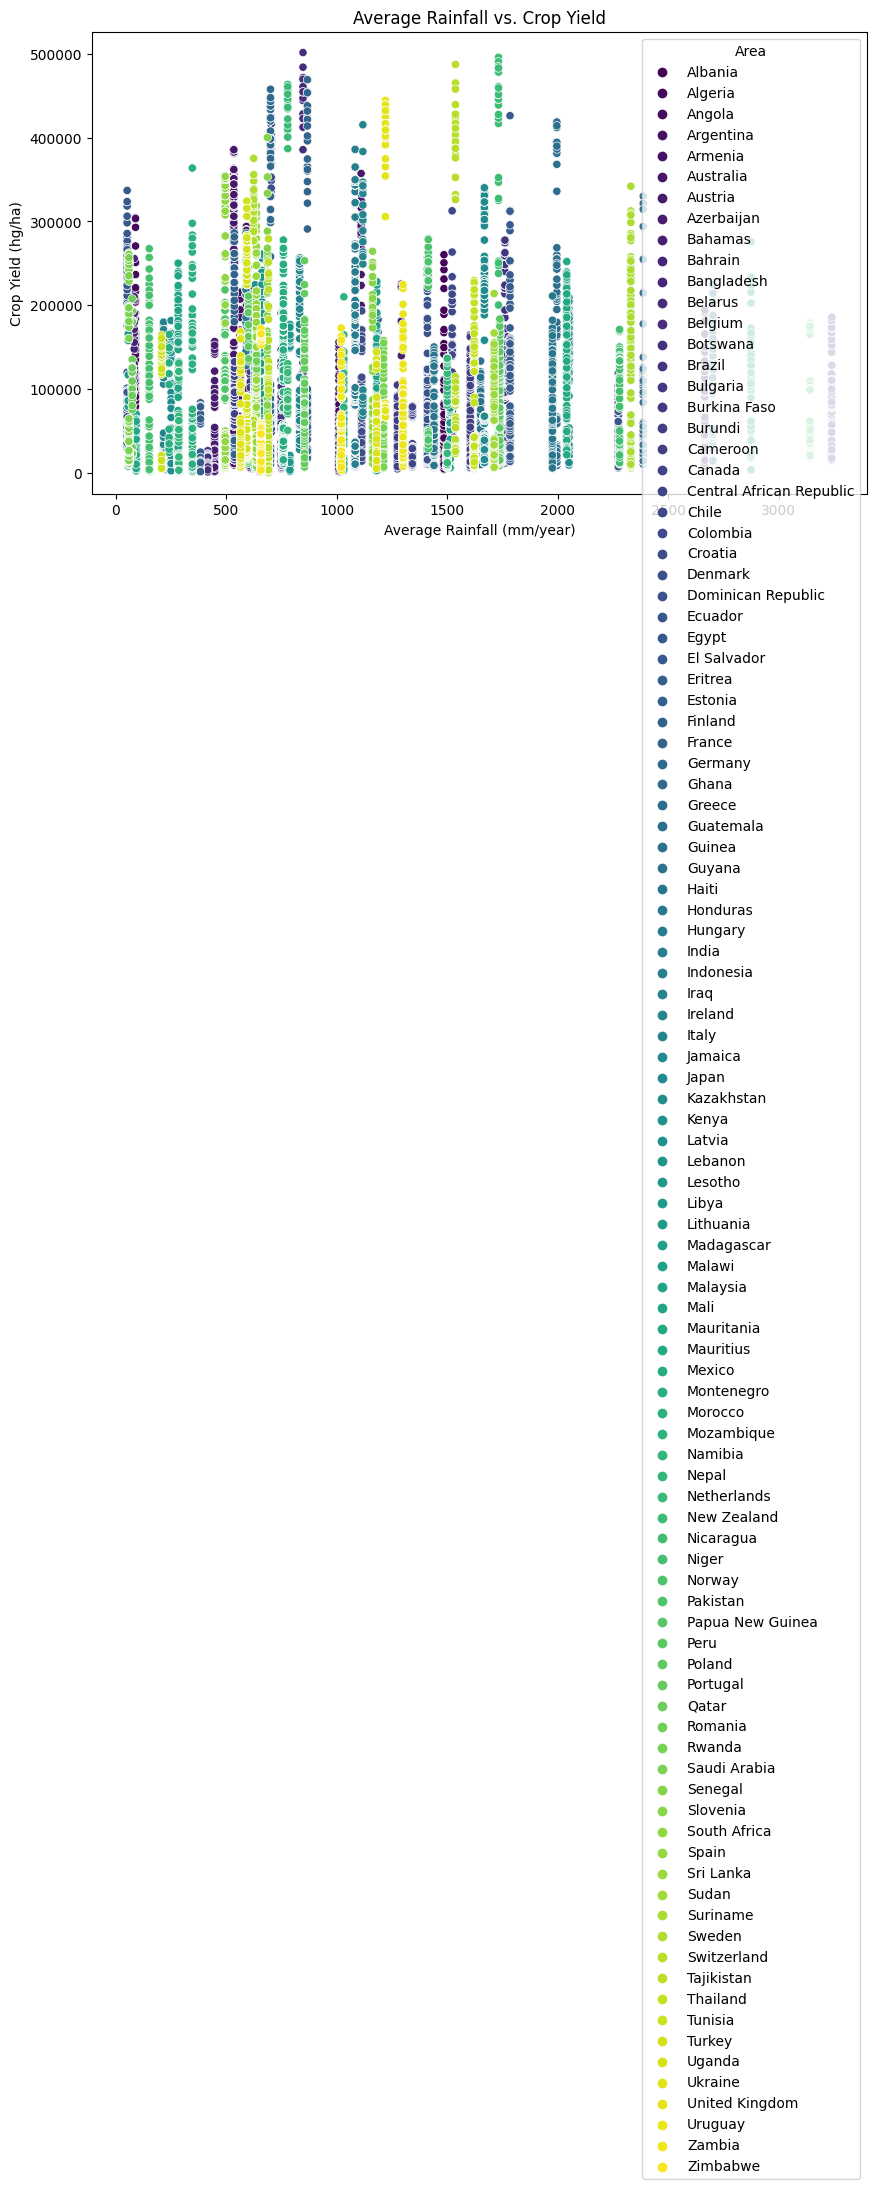

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df, hue='Area', palette='viridis')
plt.title('Average Rainfall vs. Crop Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()

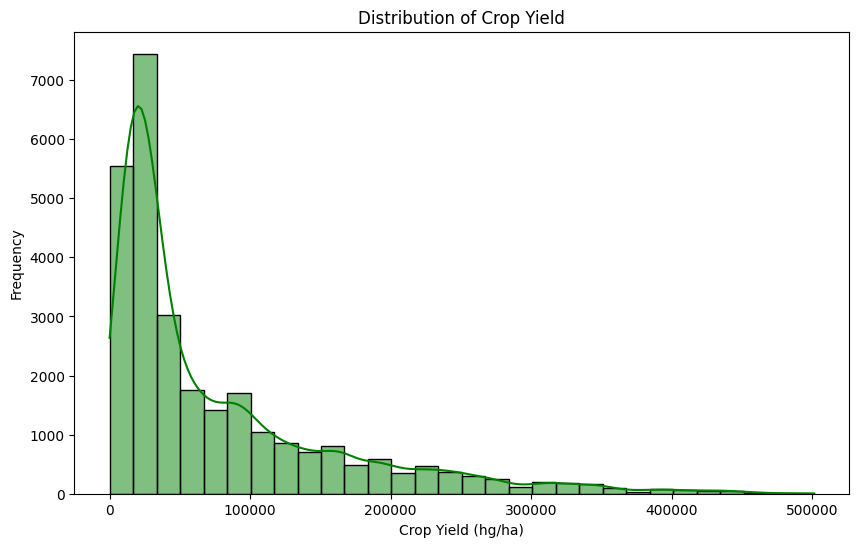

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hg/ha_yield'], bins=30, kde=True, color='green')
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

# Model Building

In [54]:
df.columns


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [55]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']


In [56]:
df = df[col]


In [57]:
df.head()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp     Area  \
0  1990                         1485.0              121.0     16.37  Albania   
1  1990                         1485.0              121.0     16.37  Albania   
2  1990                         1485.0              121.0     16.37  Albania   
3  1990                         1485.0              121.0     16.37  Albania   
4  1990                         1485.0              121.0     16.37  Albania   

          Item  hg/ha_yield  
0        Maize        36613  
1     Potatoes        66667  
2  Rice, paddy        23333  
3      Sorghum        12500  
4     Soybeans         7000

In [58]:
# Define features and target variable
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

In [59]:
X.shape

(28242, 6)

In [60]:
y.shape

(28242,)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [63]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create OneHotEncoder and StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

# Define the ColumnTransformer
preprocesser = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Standardize numerical columns
        ('OneHotEncode', ohe, [4, 5])           # One-hot encode categorical columns
    ],
    remainder='passthrough'  # Pass through the rest of the columns unchanged
)

# Apply transformations to the training data
X_train_dummy = preprocesser.fit_transform(X_train)

# Apply transformations to the test data
X_test_dummy = preprocesser.transform(X_test)

# Get the names of the output features (if using column names)
# Assuming 'col' is a list of column names
feature_names = preprocesser.get_feature_names_out()

print(feature_names)


['StandardScale__Year' 'StandardScale__average_rain_fall_mm_per_year'
 'StandardScale__pesticides_tonnes' 'StandardScale__avg_temp'
 'OneHotEncode__Area_Algeria' 'OneHotEncode__Area_Angola'
 'OneHotEncode__Area_Argentina' 'OneHotEncode__Area_Armenia'
 'OneHotEncode__Area_Australia' 'OneHotEncode__Area_Austria'
 'OneHotEncode__Area_Azerbaijan' 'OneHotEncode__Area_Bahamas'
 'OneHotEncode__Area_Bahrain' 'OneHotEncode__Area_Bangladesh'
 'OneHotEncode__Area_Belarus' 'OneHotEncode__Area_Belgium'
 'OneHotEncode__Area_Botswana' 'OneHotEncode__Area_Brazil'
 'OneHotEncode__Area_Bulgaria' 'OneHotEncode__Area_Burkina Faso'
 'OneHotEncode__Area_Burundi' 'OneHotEncode__Area_Cameroon'
 'OneHotEncode__Area_Canada' 'OneHotEncode__Area_Central African Republic'
 'OneHotEncode__Area_Chile' 'OneHotEncode__Area_Colombia'
 'OneHotEncode__Area_Croatia' 'OneHotEncode__Area_Denmark'
 'OneHotEncode__Area_Dominican Republic' 'OneHotEncode__Area_Ecuador'
 'OneHotEncode__Area_Egypt' 'OneHotEncode__Area_El Salvador

In [64]:
preprocesser.get_feature_names_out(col[:-1])


array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor  # Requires xgboost library installed
from lightgbm import LGBMRegressor  # Requires lightgbm library installed
from catboost import CatBoostRegressor  # Requires catboost library installed

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'SGD Regressor': SGDRegressor(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),  # verbose=0 to suppress output
}


Linear Regression:
 - MAE: 29261.0078
 - MSE: 1795060109.6089
 - R2 score: 0.7597
 - Accuracy (R2): 0.7597



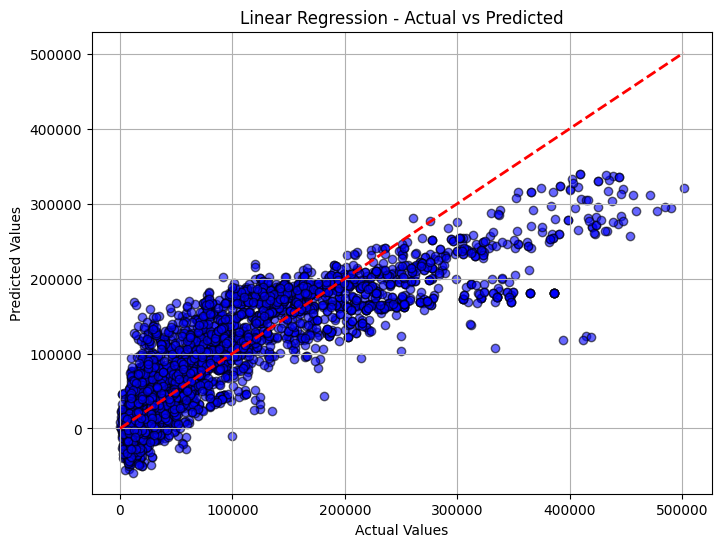

Lasso:
 - MAE: 29237.9258
 - MSE: 1795087775.1442
 - R2 score: 0.7597
 - Accuracy (R2): 0.7597



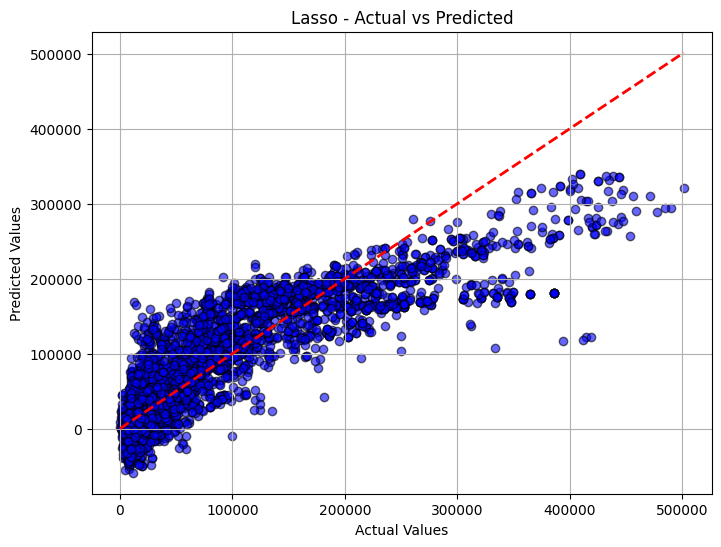

Ridge failed due to cg() got an unexpected keyword argument 'tol'

ElasticNet:
 - MAE: 55118.5931
 - MSE: 5681816185.7400
 - R2 score: 0.2395
 - Accuracy (R2): 0.2395



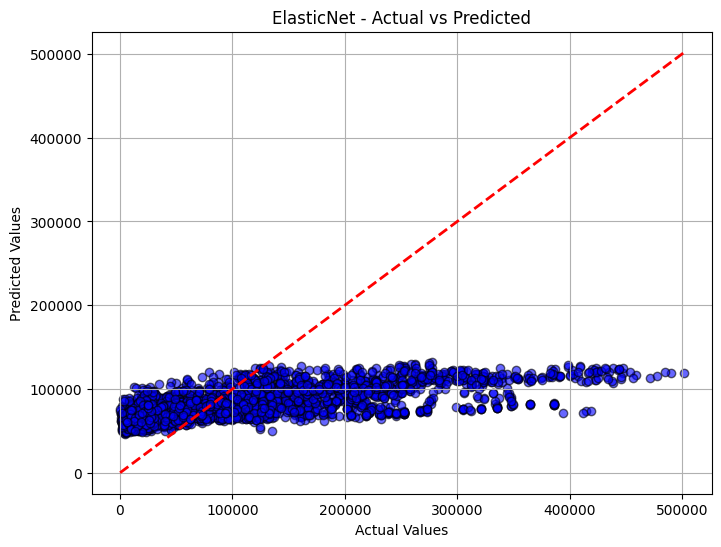

Bayesian Ridge failed due to A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

SGD Regressor:
 - MAE: 29173.3537
 - MSE: 1817226744.6619
 - R2 score: 0.7568
 - Accuracy (R2): 0.7568



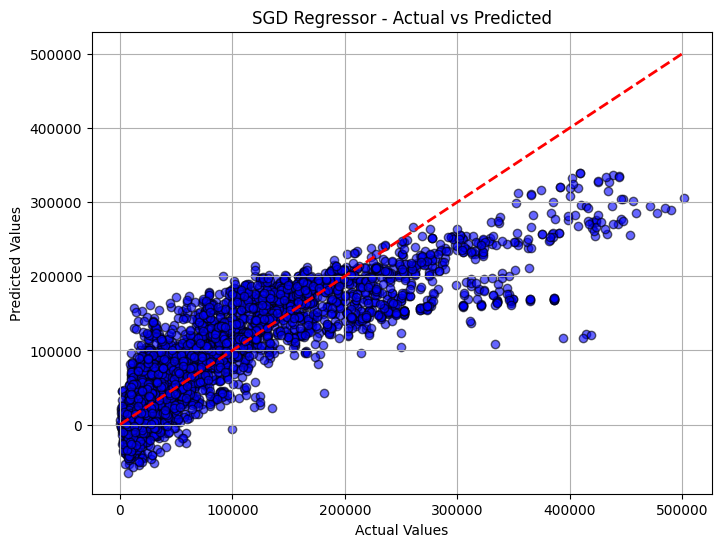

KNN:
 - MAE: 4484.3971
 - MSE: 104906891.5548
 - R2 score: 0.9860
 - Accuracy (R2): 0.9860



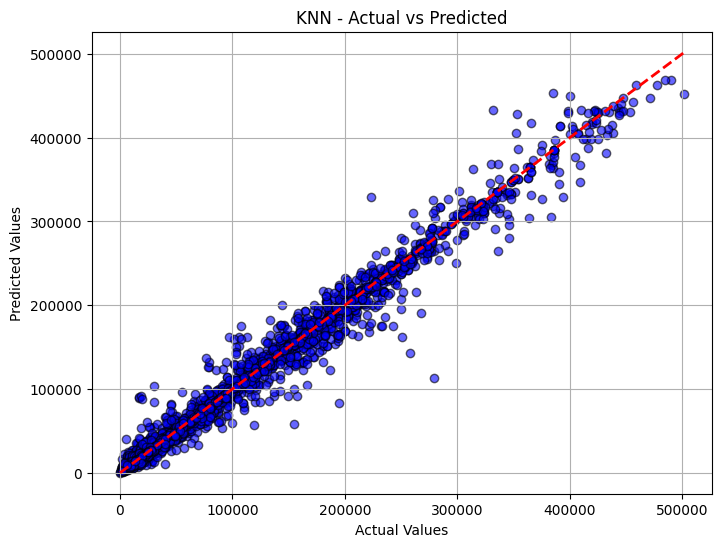

Decision Tree:
 - MAE: 3674.9448
 - MSE: 146552656.4045
 - R2 score: 0.9804
 - Accuracy (R2): 0.9804



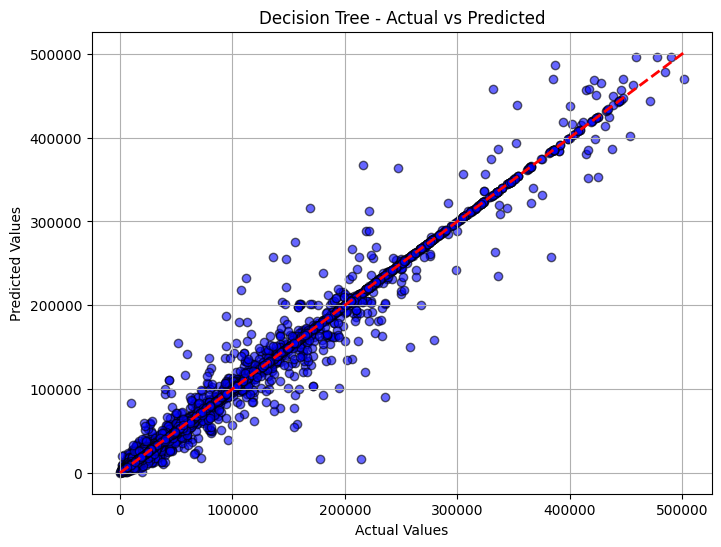

Random Forest:
 - MAE: 3471.5623
 - MSE: 83671202.1931
 - R2 score: 0.9888
 - Accuracy (R2): 0.9888



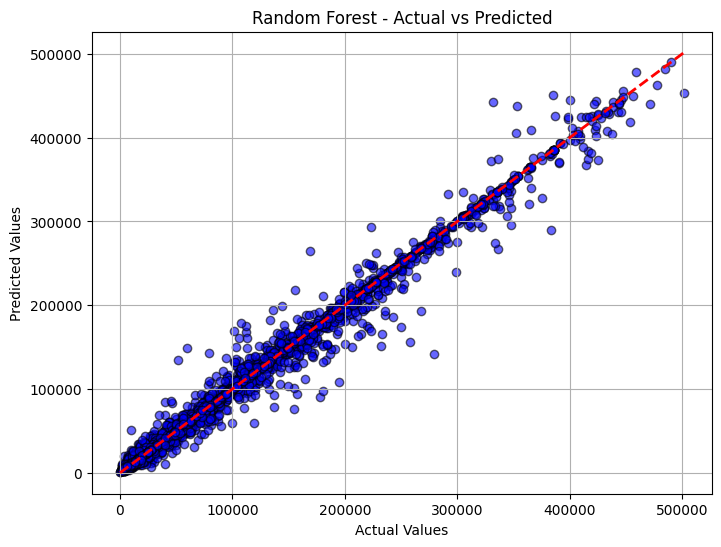

Gradient Boosting:
 - MAE: 25137.1250
 - MSE: 1717591749.0460
 - R2 score: 0.7701
 - Accuracy (R2): 0.7701



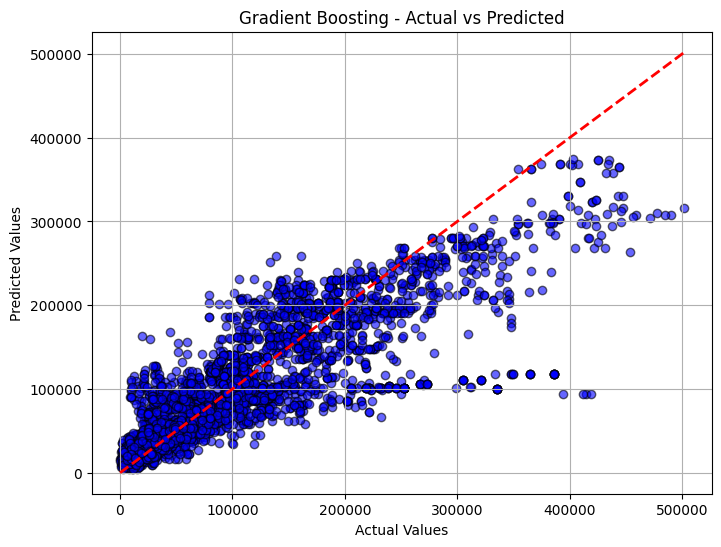

AdaBoost:
 - MAE: 49534.6572
 - MSE: 3652466346.0987
 - R2 score: 0.5111
 - Accuracy (R2): 0.5111



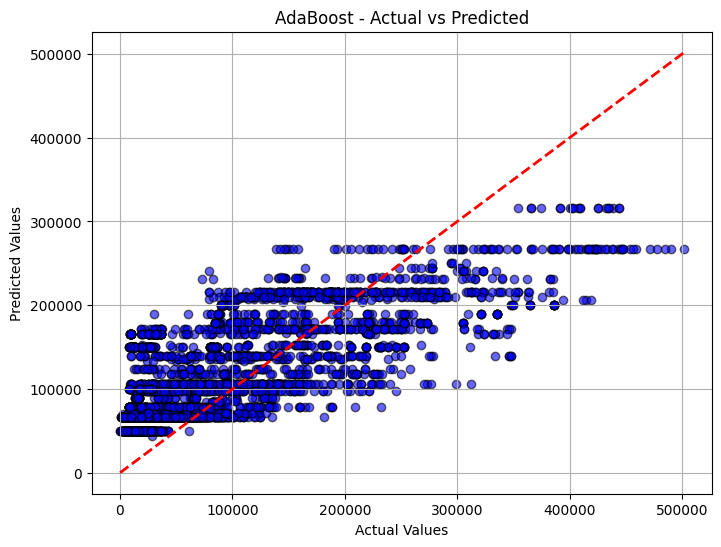

Bagging Regressor:
 - MAE: 3717.0573
 - MSE: 96423803.2570
 - R2 score: 0.9871
 - Accuracy (R2): 0.9871



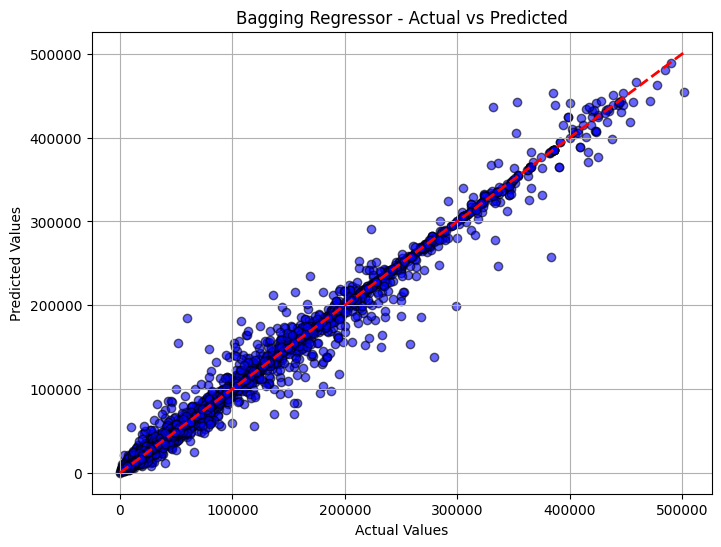

Extra Trees:
 - MAE: 2649.9518
 - MSE: 65737901.0273
 - R2 score: 0.9912
 - Accuracy (R2): 0.9912



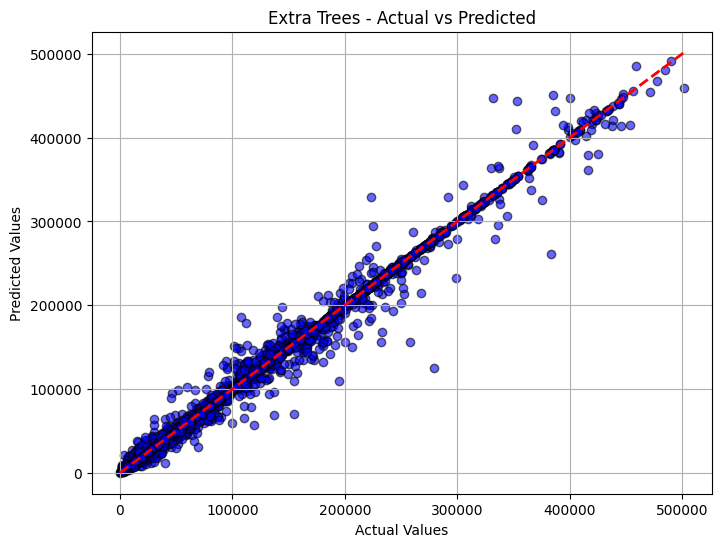

SVR:
 - MAE: 58180.7936
 - MSE: 9057592436.1568
 - R2 score: -0.2124
 - Accuracy (R2): -0.2124



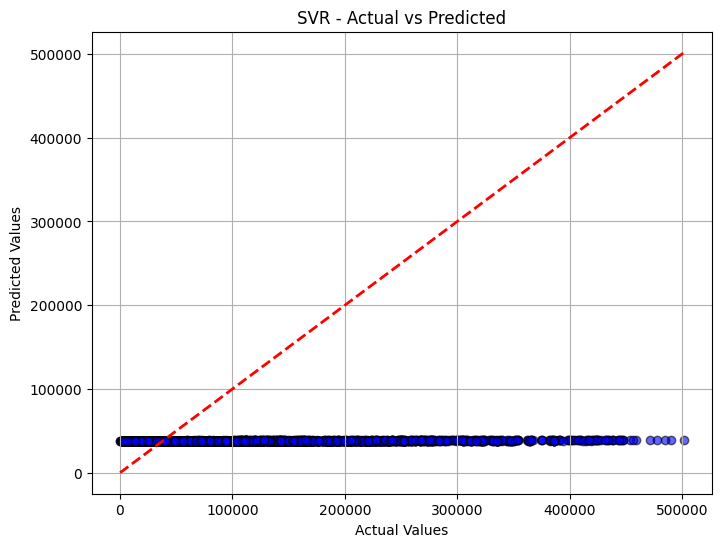

MLP Regressor:
 - MAE: 48495.6418
 - MSE: 5196269131.2414
 - R2 score: 0.3045
 - Accuracy (R2): 0.3045



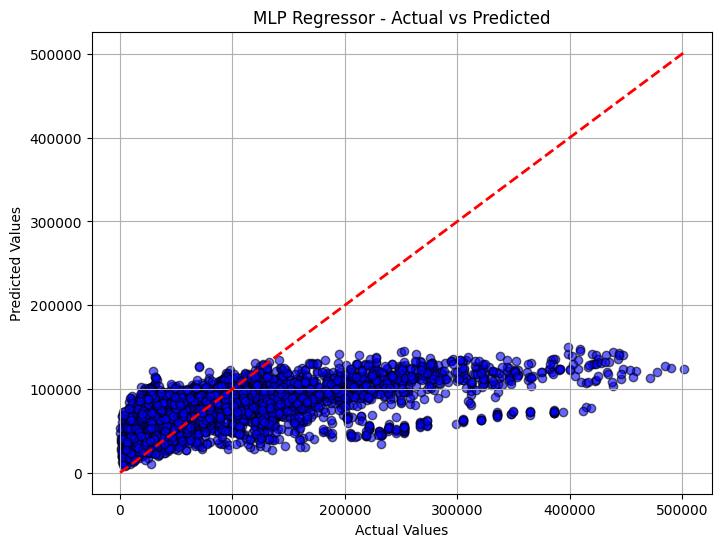

Gaussian Process failed due to A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

XGBoost:
 - MAE: 8555.2936
 - MSE: 223434742.3997
 - R2 score: 0.9701
 - Accuracy (R2): 0.9701



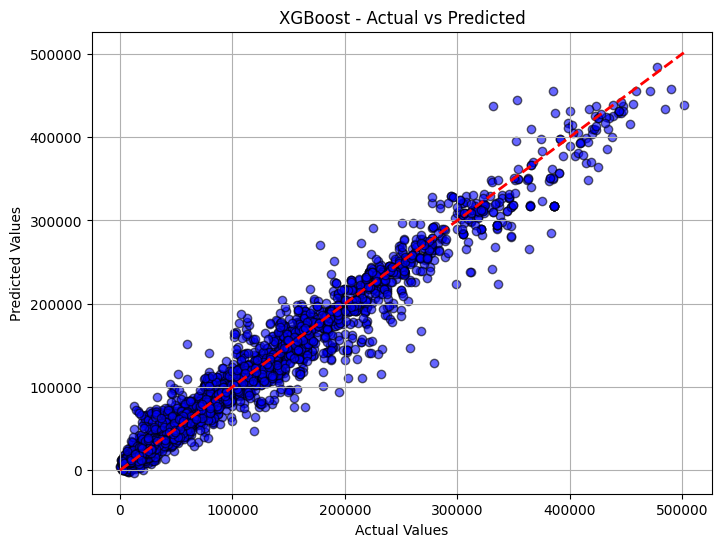

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 113
[LightGBM] [Info] Start training from score 76740.182579
LightGBM:
 - MAE: 10938.3233
 - MSE: 336487046.0759
 - R2 score: 0.9550
 - Accuracy (R2): 0.9550



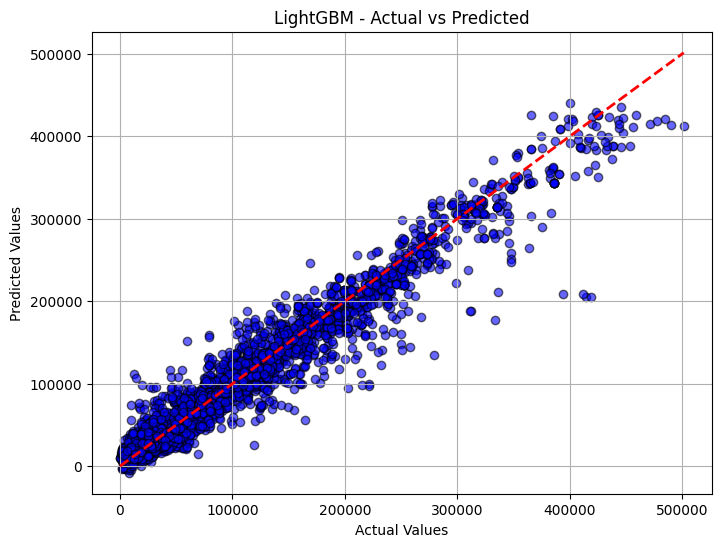

CatBoost:
 - MAE: 9687.3451
 - MSE: 245715451.6757
 - R2 score: 0.9671
 - Accuracy (R2): 0.9671



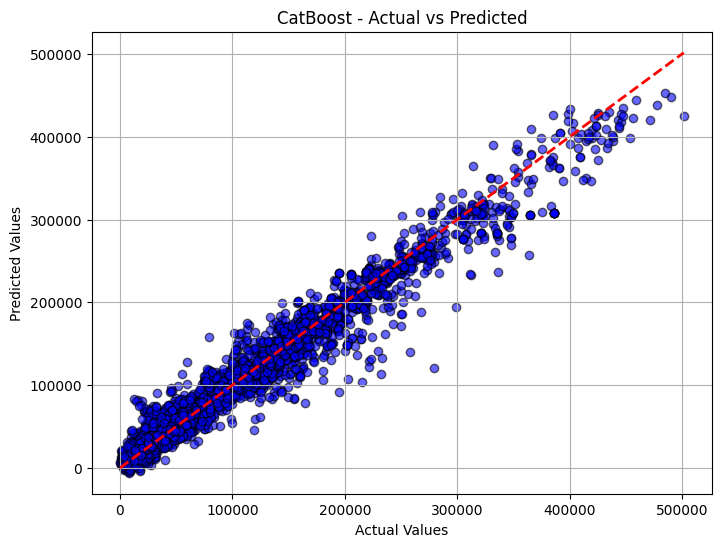

In [66]:
import matplotlib.pyplot as plt

# Loop through models, train, evaluate and plot
for name, md in models.items():
    try:
        # Fit the model on training data
        md.fit(X_train_dummy, y_train)
        
        # Predict on test data
        y_pred = md.predict(X_test_dummy)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Accuracy for regression is typically interpreted using R2 score
        accuracy = r2  # As regression does not have direct accuracy metric
        
        # Print all metrics
        print(f"{name}:")
        print(f" - MAE: {mae:.4f}")
        print(f" - MSE: {mse:.4f}")
        print(f" - R2 score: {r2:.4f}")
        print(f" - Accuracy (R2): {accuracy:.4f}\n")
        
        # Plot actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
        plt.title(f'{name} - Actual vs Predicted')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        plt.show()
    
    except Exception as e:
        print(f"{name} failed due to {e}\n")


In [67]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy,y_train)
rf.predict(X_test_dummy)

array([ 33290.63,  89712.17,  38637.61, ..., 168447.81,  93111.02,
        74844.16])

In [68]:
df.columns


Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

# Prediction

In [77]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = rf.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [80]:
result = prediction(1990,1485.0,121.0,16.00,'Albania','Maize')
result

29258.43

In [81]:
import pickle
pickle.dump(rf, open("rf.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))